In [3]:
import numpy as np

n=3 #parameter number
t=15 #data point number

x_0 = np.ones(t)
x_1 = np.random.rand(t)*10
x_2 = x_1**2
x_matrix = np.zeros([t,n])
x_matrix[:,0] = x_0
x_matrix[:,1] = x_1
x_matrix[:,2] = x_2


theta = np.zeros(n)
theta[0] = 1.5
theta[1] = 0.8
theta[2] = 0.1

mu = 0
sigma = 0.3
e =np.random.normal(mu,sigma,t)

y = np.matmul(x_matrix,theta) + e

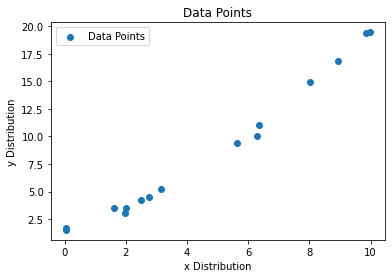

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x_1,y,label='Data Points')
plt.xlabel('x Distribution')
plt.ylabel('y Distribution')
plt.title('Data Points')
plt.legend()

In [5]:
def rls_model(parameter_num, x_vector,y_vector):
    # STEP 1: Define t,n,y,phi
    t = x_vector.shape[0]
    n = parameter_num
    y_original = y_vector.reshape([t,1])
    p0 = 10**(6)
    x_matrix = np.zeros([t,n])
    for i in range(n):
        x_matrix[:,i] = x_vector**(i)
    
    # STEP 2: p(1) initialization and initialize theta(1)
    theta_estimation_process = np.zeros([n,t])
    theta_estimation_process[:,0] = np.random.rand(n) # initialize theta vector with some values
    p_matrix = np.identity(n)*p0
    # (nxn) matrix with large values

    
    for i in range(1,15): # STEP 7: Iteration over Data Points and Update Theta Parameters [1,14]
        # STEP 3: p(t) calculation
        p_matrix = p_matrix - np.matmul(p_matrix,np.matmul(x_matrix[i,:].reshape([n,1]),np.matmul(x_matrix[i,:].reshape([1,n]),p_matrix))) / ( 1 + np.matmul(x_matrix[i,:].reshape([1,n]),np.matmul(p_matrix,x_matrix[i,:].reshape([n,1]))) )
        # the p matrix update equation implementation

        # STEP 4: Calculate K(t)
        k = np.matmul(p_matrix,x_matrix[i,:].reshape([n,1]))  # (nxn)*(nx1) = (nx1)

        # STEP 5: e(t) calculation
        e = y_original[i] - np.matmul(x_matrix[i,:].reshape([1,n]),theta_estimation_process[:,i-1].reshape([n,1]))

        # STEP 6: Update Theta Parameters
        theta_estimation_process[:,i] = (theta_estimation_process[:,i-1].reshape([n,1]) + k*e).reshape([n]) # (nx1) + (nx1)*scalar = (nx1)
    
    # STEP 8: Take the last parameters as estimated theta parameters
    theta_estimated = theta_estimation_process[:,t-1]

    # STEP 9: Find estimated y vector
    y_estimated = np.matmul(x_matrix,theta_estimated.reshape([n,1])) # (txn)*(nx1) = (tx1)

    # STEP 10: Find RLS error
    J = (np.matmul((y_original - y_estimated).reshape([1,t]), (y_original - y_estimated).reshape([t,1])))/2 # (1xt) * (tx1) = 1x1

    return [theta_estimated, y_estimated, J[0][0]]

Model 1

In [7]:
theta_estimated, y_estimated, J = rls_model(1,x_1,y)

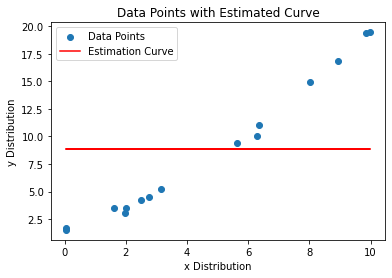

In [8]:
plt.scatter(x_1,y,label='Data Points')
plt.plot(x_1,y_estimated,color='red',label='Estimation Curve')
plt.xlabel('x Distribution')
plt.ylabel('y Distribution')
plt.title('Data Points with Estimated Curve')
plt.legend()

In [9]:
table = []
table.append([theta_estimated[0],'-','-','-',J])

Model 2

In [10]:
theta_estimated, y_estimated, J = rls_model(2,x_1,y)

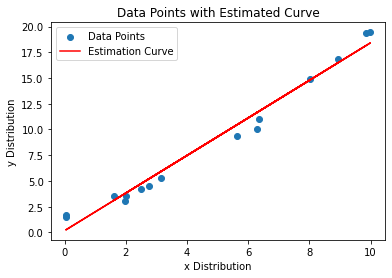

In [11]:
plt.scatter(x_1,y,label='Data Points')
plt.plot(x_1,y_estimated,color='red',label='Estimation Curve')
plt.xlabel('x Distribution')
plt.ylabel('y Distribution')
plt.title('Data Points with Estimated Curve')
plt.legend()

In [12]:
table.append([theta_estimated[0],theta_estimated[1],'-','-',J])

Model 3

In [13]:
theta_estimated, y_estimated, J = rls_model(3,x_1,y)

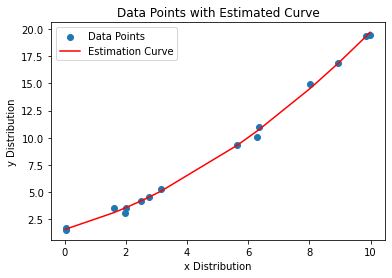

In [14]:
plt.scatter(x_1,y,label='Data Points')
plt.plot(sorted(x_1),sorted(y_estimated),color='red',label='Estimation Curve')
plt.xlabel('x Distribution')
plt.ylabel('y Distribution')
plt.title('Data Points with Estimated Curve')
plt.legend()

In [15]:
table.append([theta_estimated[0],theta_estimated[1],theta_estimated[2],'-',J])

Model 4

In [16]:
theta_estimated, y_estimated, J = rls_model(4,x_1,y)

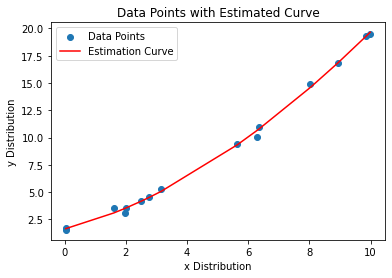

In [17]:
plt.scatter(x_1,y,label='Data Points')
plt.plot(sorted(x_1),sorted(y_estimated),color='red',label='Estimation Curve')
plt.xlabel('x Distribution')
plt.ylabel('y Distribution')
plt.title('Data Points with Estimated Curve')
plt.legend()

In [18]:
table.append([theta_estimated[0],theta_estimated[1],theta_estimated[2],theta_estimated[3],J])

Table

In [19]:
import pandas as pd

table = pd.DataFrame(table)

In [20]:
table['Theta 0']=table[0]
table['Theta 1']=table[1] 
table['Theta 2']=table[2] 
table['Theta 3']=table[3] 
table['RLS Error']=table[4]
table = table.drop([0,1,2,3,4],axis=1)
table.index = ['Model 1','Model 2','Model 3','Model 4']

In [21]:
table

,Theta 0,Theta 1,Theta 2,Theta 3,RLS Error
Model 1,8.861574,-,-,-,289.155499
Model 2,0.172657,1.825832,-,-,6.434163
Model 3,1.572324,0.795882,0.102075,-,0.513049
Model 4,1.621176,0.715851,0.123494,-0.001434,0.505189
